# <center> <img src="../../labs/img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
### <center> **Big Data** </center>
---
### <center> **Spring 2025** </center>
---
**Mid-term exam**

**Date**: 3/12/2025

**Student Name**: Eddie Aguilar Ceballos



**Professor**: Pablo Camarillo Ramirez

## Problem Statement

You are given two datasets:

- Sales Data: Contains information about sales transactions.

- Product Data: Contains information about products.

## Deliverable

You need to upload the PR link containing the Notebook (spark_cluster/notebooks/exams/midterm/exam_<student_name>.ipynb) solutions for the business questions described below.

NOTES:

- The Spark application name should "Mid-tem exam: <Your Name>" <br>
- Only TWO actions should be reported in the Notebook 

## Business Questions

Your task is to analyze the data using PySpark and answer the following business questions:

1. Read the Data (10 points):

    - Load the sales.csv and products.csv files into PySpark DataFrames. You need to use your team's spark_utils implementation to produce the schema.

2. Join Operations (20 points):

    - Join the sales DataFrame with the products DataFrame on product_id to enrich the sales data with product details.

3. Group and Aggregate (10 points):

    - Calculate the total sales amount (sale_amount) for each product category (category).

4. Transformations (Using when()) (20 points):

    - Add a new column sale_type to the enriched sales DataFrame:

    - If sale_amount is greater than or equal to 50, set sale_type to "High".

    - Otherwise, set sale_type to "Low".

5. Filter (10 points):

    - Filter the enriched sales DataFrame to include only rows where the category is "Electronics".

6. Select (10 points):

    - Select only the product_name, sale_amount, and sale_type columns from the filtered DataFrame.

7. Display the  Spark Plan (10 points):

    - Add to your Notebook an Screenshot of the DAG associated with your spark application. Your name should be visible and it should be the name of the application.

8. Actions (10 pints):

    - Show the first 5 rows of the resulting data frame and count the rows of the resulting DataFrame

## Solution

In [74]:
import findspark
findspark.init()

In [75]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SparkSQL-Exam-1-Eddie") \
    .master("spark://8776010e8f6a:7077") \
    .config("spark.ui.port","4040") \
    .getOrCreate()
sc = spark.sparkContext

### 1. Read the Data

In [76]:
#import importlib
from foraneos.spark_utils import SparkUtils as SpU

#importlib.reload(SpU)


sales_schema = SpU.generate_schema([("transaction_id", "string", False), 
                                              ("product_id", "string", False),
                                              ("customer_id", "string", False), 
                                              ("sale_amount", "double", True), 
                                              ("sale_date", "timestamp",True)                                                                     
                                              ])

sales = spark.read \
                .schema(sales_schema) \
                .option("header", "true") \
                .csv("/home/jovyan/notebooks/data/sales.csv")

sales.printSchema()

products_schema = SpU.generate_schema([("product_id", "int", False), 
                                       ("product_name", "string", True),
                                       ("category", "string", True),
                                       ("price", "float", True)])

products = spark.read \
                .schema(products_schema) \
                .option("header", "true") \
                .csv("/home/jovyan/notebooks/data/products.csv")

products.printSchema()

root
 |-- transaction_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- sale_amount: double (nullable = true)
 |-- sale_date: timestamp (nullable = true)

root
 |-- product_id: integer (nullable = true)
 |-- product_name: string (nullable = true)
 |-- category: string (nullable = true)
 |-- price: float (nullable = true)



### 2. Join Operations

In [77]:
sales_complete = sales.join(products, sales["product_id"] == products["product_id"], "left")

### 3. Group and Aggregate

In [78]:
from pyspark.sql.functions import sum
sales_per_category = sales_complete.groupBy("category").agg(sum("sale_amount").alias("total_sales"))

### 4. Transformations

In [79]:
from pyspark.sql.functions import when

sales_complete = sales_complete.withColumn("sale_type", when(sales_complete["sale_amount"] >= 50, "High").otherwise("Low"))

### 5. Filter

In [80]:
sales_complete = sales_complete.filter(sales_complete["category"] == "Electronics")

### 6. Select

In [81]:
sales_complete = sales_complete.select("product_name", "sale_amount", "sale_type")

### 7. Display the spark plan

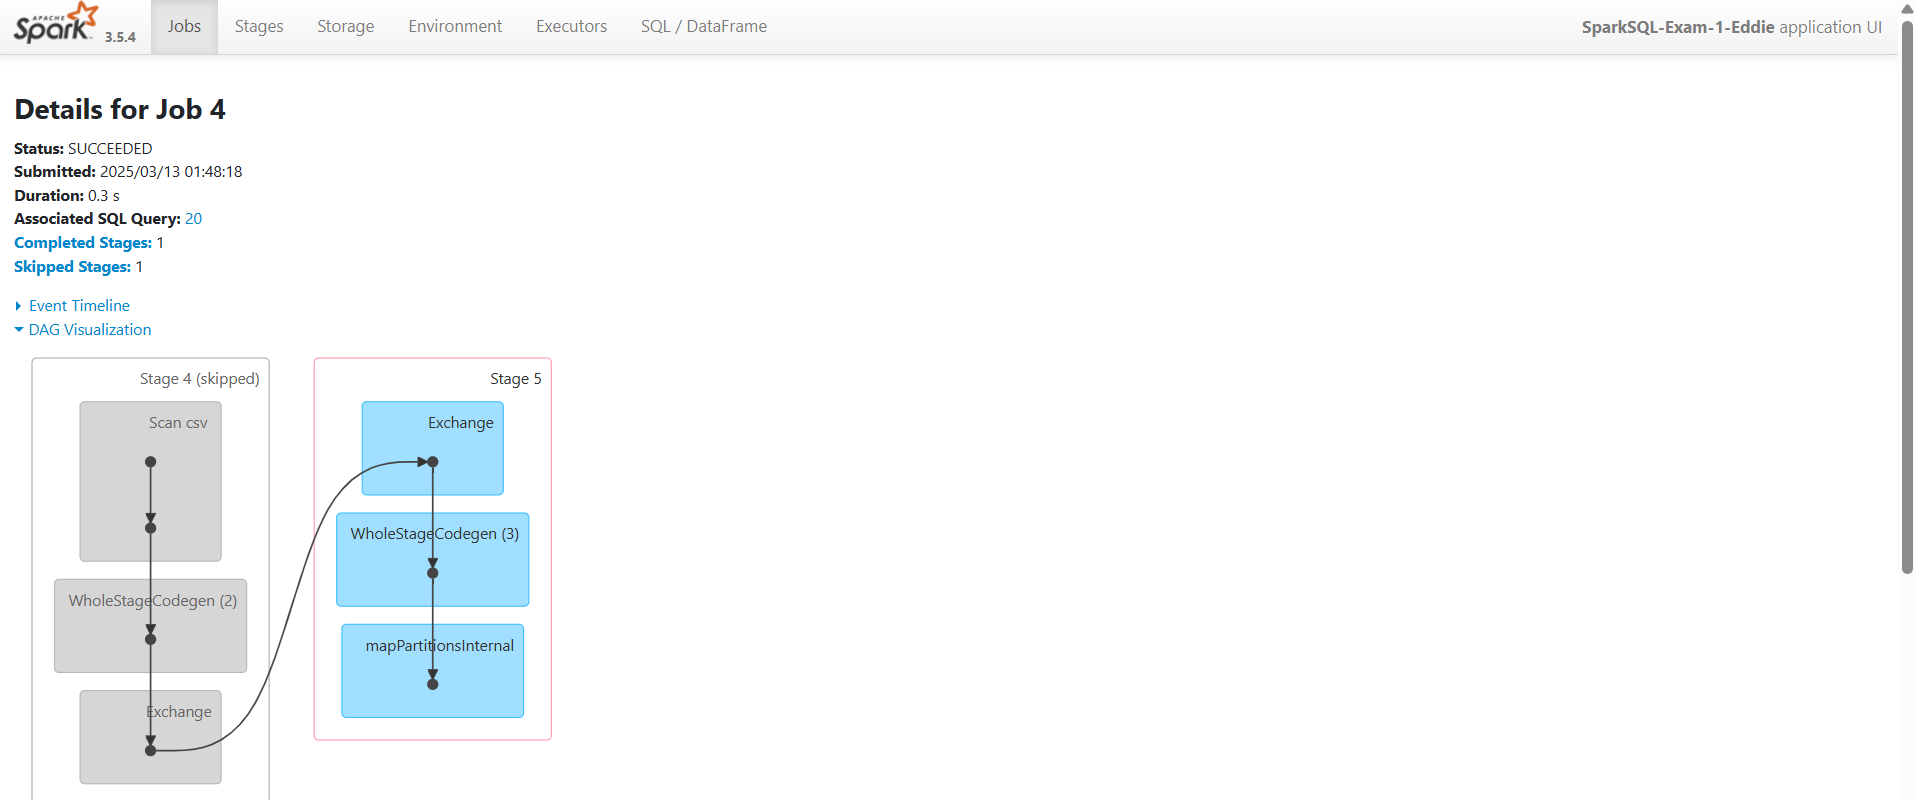

### 8. Actions

In [82]:
sales_complete.show(5)


+------------+-----------+---------+
|product_name|sale_amount|sale_type|
+------------+-----------+---------+
| Product 100|      55.14|     High|
| Product 100|     694.06|     High|
| Product 100|      64.41|     High|
| Product 100|     472.98|     High|
| Product 100|     228.41|     High|
+------------+-----------+---------+
only showing top 5 rows



In [83]:
sales_complete.count()

612

In [84]:
#sc.stop()